In [14]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Inner Products, Orthonormality, and Projections

Remember a $\ket{\psi}$ is a column vector and $\bra{\psi}$ is a row vector and is the conjugate transpose of $\ket{\psi}$. So $\bra{\psi} = (\ket{\psi})^\dagger$. Or for some classical states $\Sigma$.
$$
\ket{\psi} = \sum_{a \in\Sigma} \alpha_a \ket{a} \text{ then bra is the conjugate transpose} \\
\bra{\psi} = \sum_{a \in \Sigma} \bar{\alpha_a} \bra{a}
$$
Suppose we have $\ket{\psi} = \sum_{a\in\Sigma} \alpha_a \ket{a}$ and $\ket{\phi} = \sum_{b\in\Gamma} \beta_b\ket{b}$ each with $n$ classical states. Then we know that 
$$
\braket{\psi|\phi} = 
\begin{pmatrix}
\bar{\alpha_1} \dots \bar{\alpha_n}
\end{pmatrix}
\begin{pmatrix}
\bar{\beta_1}\\ \dots \\ \bar{\beta_n}
\end{pmatrix} \\
= \bar{\alpha_1}\beta_1 + \dots + \bar{\alpha_n}\beta_n \\
= \sum_{a\in\Sigma}\sum_{b\in\Gamma} \bar{\alpha_a}\beta_b \braket{a|b} 
\text{ note } \braket{a|a} = 1 \text{ and } \braket{a|b} = 0 \text{ thus}\\
= \sum_{a\in \Sigma} \bar{\alpha_a}\beta_a
$$
aka your standard dot product.

### Basic Facts of Inner Product
* The inner product of a vector with itself is the *Euclidean Norm*
$$
\braket{\psi|\psi} = \sum \bar{\alpha_a} \alpha_a = \sum |\alpha_a|^2 = ||\ket{\psi}||^2
$$
* **Conjugate Symmetry** for any two vectors we have 
$$
\bar{\braket{\psi|\phi}} = \braket{\phi|\psi}
$$
* *Linearity in the second argument (and conjugate linearity in the first)
$$
\text{If } \ket{\phi} = \alpha_1 \ket{\phi_1} + \alpha_2 \ket{\phi_2} \text{ Then } \\
\braket{\psi|\phi} \\
= \braket{\psi|(\alpha_1 \ket{\phi_1} + \alpha_2 \ket{\phi_2})} \\
= \alpha_1\braket{\psi|\phi_1} + \alpha_2\braket{\psi|\phi_2}
$$
Similarly you can do the same to the first argument just conjugate $\alpha_1$ and $\alpha_2$.
* **The Couchy-Schwarz Inequality**. For every vector $\ket{\phi}$ and $\ket{\psi}$ with the same number of entries we have 
$$
|\braket{\psi|\phi}| \le ||\ket{\psi}||||\ket{\phi}||
$$
i.e the magnitude of the inner product is less than or equal to the product of the euclidean norms of the vector. They will only be equal if one of the vectors is equal to some scaler times the other (aka parallel).


### Orthogonal and Orthonormal Sets
Two vectors $\ket{\psi}$ and $\ket{\phi}$ are *orthogonal* if their inner product is zero. Can be thought of as perpindicular. 

An *orthogonal set* is a set of vectors where all pairs of paris are orthogonal.

An *orthonormal set* is an orthogonal set of unit vectors. 

An *orthonormal basis* is an orthonormal set that is also a basis for a given vector space. 

For example $\{\ket{+}, \ket{-}\}$ form an orthonormal basis for the 2d space of a single qubit. The bell basis is an orthonormal basis for the 4d space of 2 qubits. And for any classical state set $\Sigma$ the set of all standard basis vectors $\{\ket{a} : a \in \Sigma\}$ is an orthonormal basis.

Fact
Given an orthonormal set of vectors $\{\ket{\psi_1}, \dots , \ket{\psi_m}\}$ in $n$ dimensional space. If $m < n$ then there must exist vectors 
$$
\ket{\psi_{m+1}}, \dots, \ket{\psi_n}
$$
such that $\{\ket{\psi_1}, \dots, \ket{\psi_n}\}$ is an orthonormal basis.

The orthonormal basis can be found using the *Gram-Schmidt* orthogonalization process.

### Orthonormal sets and unitary matrices
For any square matrix $U$ the following are equivalent. 
1. The matrix $U$ is unitary (i.e., $U\dagger U = I = U U\dagger$)
2. The rows of $U$ form an orthonormal set.
3. The columns of $U$ form an orthonormal set.

### Projection Matrices
A square matrix $\Pi$ is called a *projection* if it satisfies 
1. $\Pi = \Pi^\dagger$ (Hermitian)
2. $\Pi^2 = \Pi$ (Idempotent)

Matrices that satisfy the first condition are called *Hermitian matrices* and matrices that satify the second are *idempotent* matrices.

These can be thought of as projecting an image onto a screen. You leave part of it alone but zero out the rest. So doing it once makes a change but again does not. 

An example it $\Pi = \ket{\psi}\bra{\psi}$ for any unit vector $\ket{\psi}$. Remember $(AB)^\dagger = B^\dagger A^\dagger$.
$$
\Pi^\dagger \\
= (\ket{\psi}\bra{\psi})^\dagger \\
= (\bra{\psi})^\dagger (\ket{\psi})^\dagger \\
= \ket{\psi}\bra{\psi} \\
= \Pi
$$
To prove condition 2 remember $\ket{\psi}$ is a unit vector.
$$
\Pi^2 \\
= (\ket{\psi}\bra{\psi})^2 \\
= \ket{\psi} \braket{\psi|\psi}\bra{\psi} \\
= \ket{\psi}\bra{\psi} \\
= \Pi
$$
More generally if $\{\ket{\psi_1}, \dots \ket{\psi_m}\}$ is any orthonormal set of vectors then the matrix 
$$
\Pi = \sum_{k =1}^m \ket{\psi_k}\bra{\psi_k}
$$
is a projection.



### Projective Measurements
Assume $\Sigma$ is a finite non-empty set of classical states. A collection of projections $\{\Pi_k : k \in \Sigma\}$ that satisfies
$$
\sum_{k\in\Sigma} \Pi_k = I
$$
describes a *projective measurement*.

When you measure a quantum state $\ket{\psi}$ two things happen.
1. For each $k \in \mathbf{N} < m$ the outcome of the measurement is $k$ with probability equal to 
$$
P(\ket{\psi} = k) = ||\Pi_k\ket{\psi}||^2
$$
2. For whichever outcome $k$ the measurement produces the state of $X$ becomes 
$$
\frac{\Pi_k\ket{\psi}}{||\Pi_k\ket{\psi}||}
$$

Any projective measurements can be implemetned using unitary operation and standard basis measurements. 

### Example of Projective Measurement
Consider the two qubit case $(X, Y)$ with projective measurement $\{\Pi_0, \Pi_1\}$ which will consist of the bell states where
$$
\Pi_0 = \ket{\phi^+}\bra{\phi^+} + \ket{\phi^-}\bra{\phi^-} + \ket{\psi^+}\bra{\psi^+} \\
\Pi_1 = \ket{\psi^-}\bra{\psi^-}
$$
This is interesting because $\Pi_0$ projects onto the space spanned by the symmetric bell states and $\Pi_1$ projects onto the space spanned by the anti-symmetric bell state (The one that get negated when swapped).

Any projective measurement can be implemented by unitary operations and standard basis measurements. This one can be represented by a circuit with a Hadamard, a Fredkin, and another Hadamard. Measuring the bottom qubit is equivalent to measuring the top 2 with the projective measurement (Why is not shown here). 

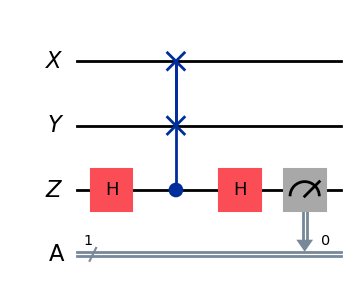

In [13]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
Z = QuantumRegister(1, "Z")
A = ClassicalRegister(1, "A")

c = QuantumCircuit(X, Y, Z, A)

c.h(Z)
c.cswap(Z, X, Y)
c.h(Z)
c.measure(Z, A)
display(c.draw("mpl"))
